In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./HR_comma_sep_department_solve.csv")
print(df)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

# show ว่ามีทั้งหมดกี่เเผนก

In [2]:
departments = df['department'].unique()
departments

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [3]:
salarys = df['salary'].unique()
salarys

array(['low', 'medium', 'high'], dtype=object)

# encode data

In [4]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# df["department"] = encoder.fit_transform(df["department"])
# df["salary"] = encoder.fit_transform(df["salary"])

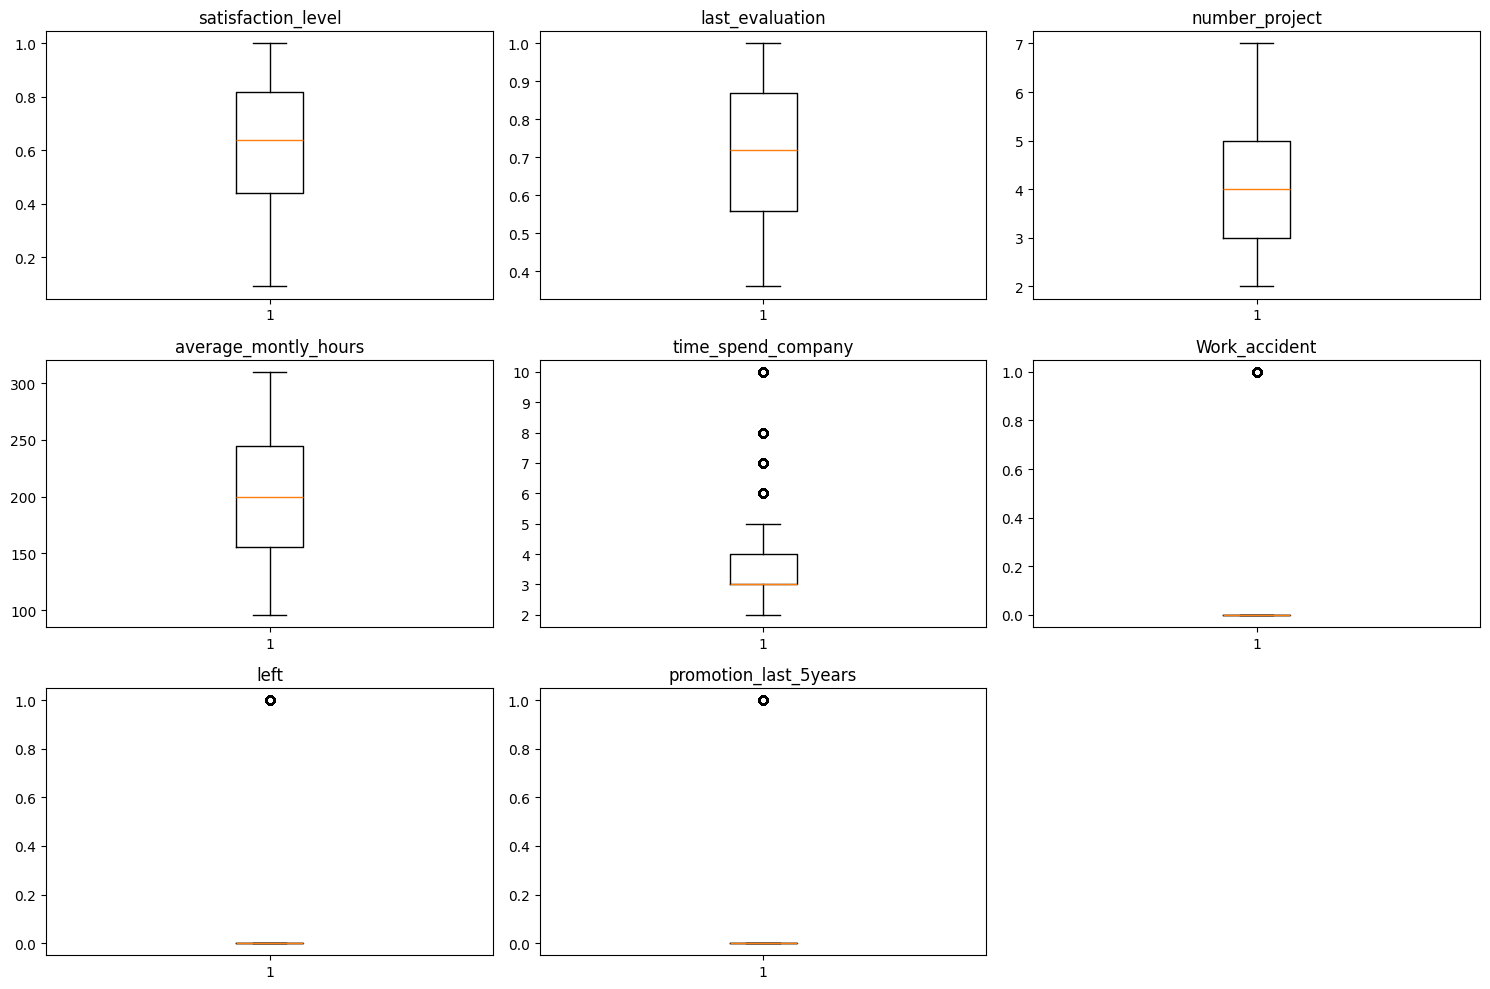

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numerical_cols = df.select_dtypes(include=['number']).columns

# กำหนดขนาดของ Figure และจำนวน Subplot
plt.figure(figsize=(15, 10))
num_plots = len(numerical_cols)
subplot_rows = int(np.ceil(np.sqrt(num_plots)))
subplot_cols = int(np.ceil(num_plots / subplot_rows))

# สร้าง Subplot
for i, col in enumerate(numerical_cols):
    plt.subplot(subplot_rows, subplot_cols, i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object


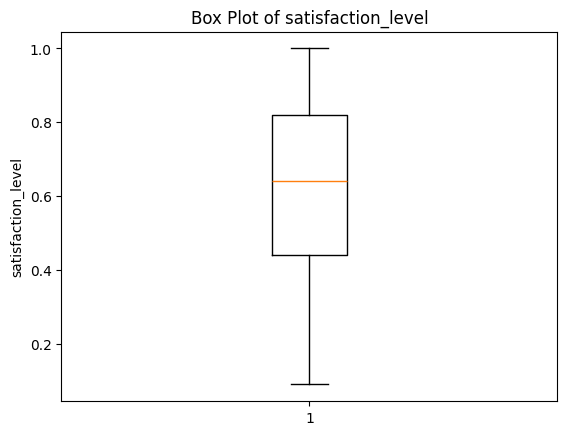

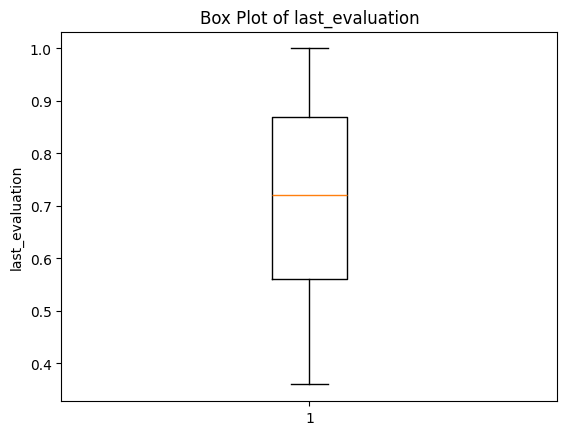

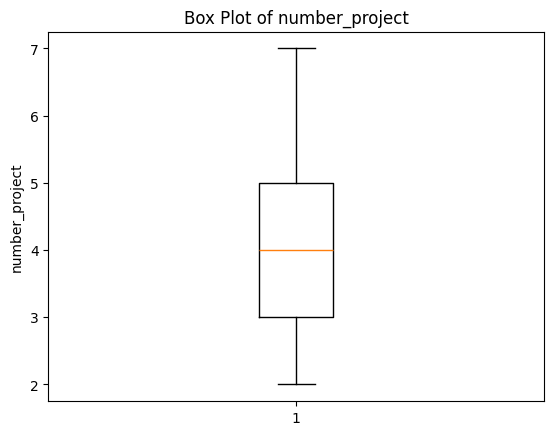

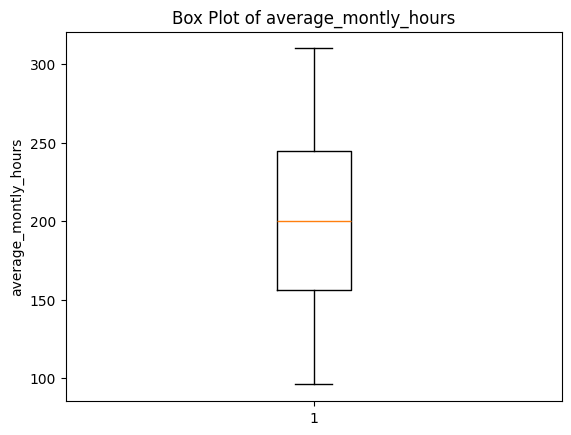

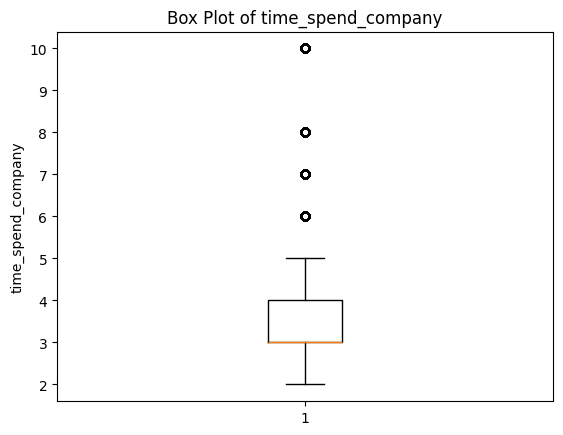

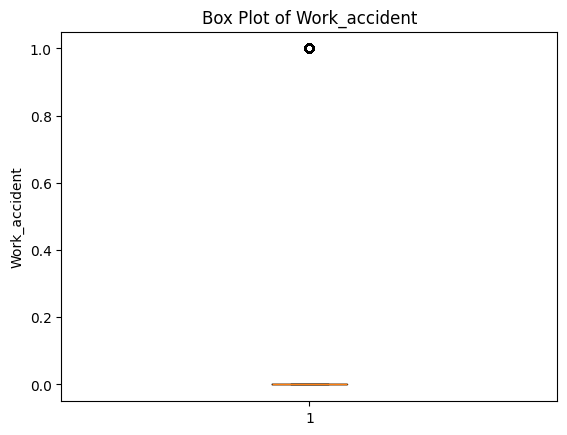

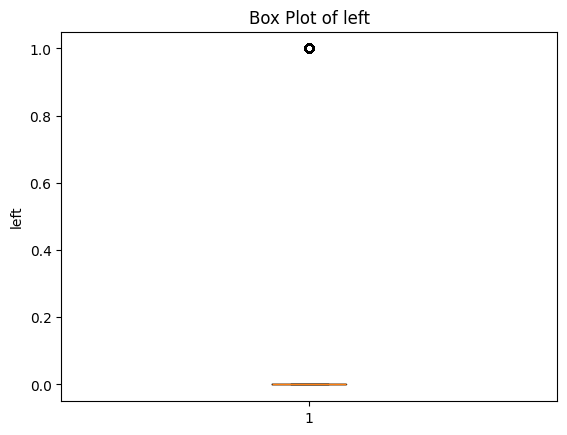

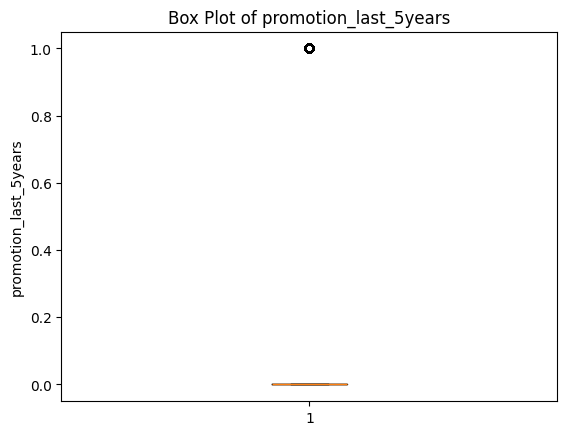

3008
0.09 1.0
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. ตรวจสอบ Missing Values
print(df.isnull().sum())

# 2. ตรวจสอบ Data Types
print(df.dtypes)

# 3. ตรวจสอบ Outliers (ตัวอย่าง: ใช้ Box Plot สำหรับตัวแปรเชิงตัวเลข)
def plot_boxplot(col):
    plt.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plot_boxplot(col)

# 4. ตรวจสอบค่าที่ซ้ำกัน
print(df.duplicated().sum())

# 5. ตรวจสอบค่าที่ไม่สมเหตุสมผล (Domain-specific)
# (ตัวอย่าง: ค่า satisfaction_level ต้องอยู่ในช่วง 0-1)
print(df['satisfaction_level'].min(), df['satisfaction_level'].max())

# 6. วิเคราะห์เชิงสถิติเบื้องต้น
print(df.describe())

In [7]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# # เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข

# df_numeric = df.select_dtypes(include=['number'])

# # คำนวณ Correlation Matrix
# corr_matrix = df_numeric.corr()

# # สร้าง Heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# วิเคราะ corr



สร้าง histogram ของเเต่ละ feature สำหรับข้อมูลที่ left = 1

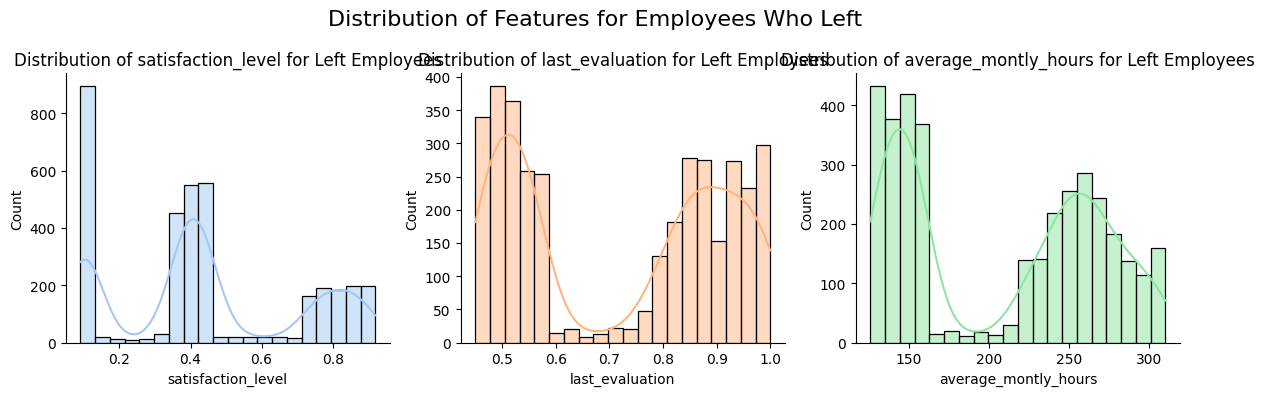

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the data for employees who left
left_employees = df[df['left'] == 1]

# Select the features to plot
features_to_plot = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']

# Set a custom color palette
custom_palette = sns.color_palette("pastel")

# Create subplots for each feature
plt.figure(figsize=(12, 4))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=left_employees, x=feature, kde=True, color=custom_palette[i], bins=20)
    plt.title(f'Distribution of {feature} for Left Employees')
    plt.xlabel(feature)
    plt.ylabel('Count')
    sns.despine()  # Remove the top and right spines

# Add a title for the entire figure
plt.suptitle('Distribution of Features for Employees Who Left', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# คนที่ลาออก
1. ***satisfaction_level*** พนักงานประเมินบริษัท
2. ***last_evaluation*** บริษัทประเมิณพนักงาน
3. ***average_montly_hours*** คือชั่วโมงทำงานต่อเดือน

# visualize record ที่ ค่าข้างในซ้ำกันออก

In [9]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# record ที่ซ้ำกันออก

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_dupless = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df_dupless

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


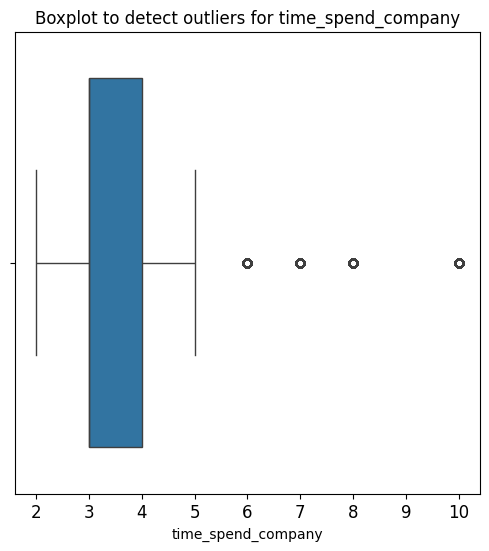

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for time_spend_company', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['time_spend_company'])
plt.show()

In [12]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `time_spend_company`
percentile25 = df['time_spend_company'].quantile(0.25)

# Compute the 75th percentile value in `time_spend_company`
percentile75 = df['time_spend_company'].quantile(0.75)

# Compute the interquartile range in `time_spend_company`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `time_spend_company`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `time_spend_company`
outliers = df[(df['time_spend_company'] > upper_limit) | (df['time_spend_company'] < lower_limit)]

# Count how many rows in the data contain outliers in `time_spend_company`
print("Number of rows in the data containing outliers in `time_spend_company`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `time_spend_company`: 1282


In [13]:
df_dupless_outlierless = df_dupless[(df_dupless['time_spend_company'] < upper_limit) & (df_dupless['time_spend_company'] > lower_limit)]
df_dupless_outlierless.shape

(11167, 10)

# data set ทั้งหมดที่เรามีในตอนนี้

In [14]:
# df_numeric.shape

In [15]:
df_dupless.shape

(11991, 10)

In [16]:
df_dupless_outlierless.shape

(11167, 10)

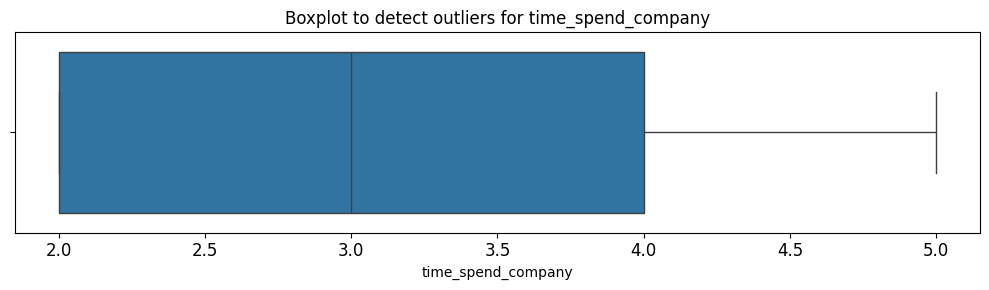

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... your code to create df_dupless_outlierless

plt.figure(figsize=(10, 3))
plt.title('Boxplot to detect outliers for time_spend_company', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_dupless_outlierless['time_spend_company'])
plt.tight_layout()
plt.show()

# heatmap ของ df ที่ไม่มี outlier

In [18]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# # เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
# df_dupless_outlierless = df_dupless_outlierless.select_dtypes(include=['number'])

# # คำนวณ Correlation Matrix
# corr_matrix = df_dupless_outlierless.corr()

# # สร้าง Heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [19]:
df_dupless_outlierless

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,sales,medium
11986,0.48,0.50,5,142,4,0,0,0,IT,medium
11987,0.19,0.79,4,229,4,0,0,0,product_mng,medium
11992,0.62,0.85,3,237,3,1,0,0,IT,medium


In [20]:
df_enc = df_dupless_outlierless.copy()
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# df_enc["department"] = encoder.fit_transform(df_enc["department"])
# df_enc["salary"] = encoder.fit_transform(df_enc["salary"])

df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc
# df_enc.shape

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,1,False,False,False,False,False,False,False,True,False,False
11986,0.48,0.50,5,142,4,0,0,0,1,True,False,False,False,False,False,False,False,False,False
11987,0.19,0.79,4,229,4,0,0,0,1,False,False,False,False,False,False,True,False,False,False
11992,0.62,0.85,3,237,3,1,0,0,1,True,False,False,False,False,False,False,False,False,False


In [21]:
df_enc['left'].value_counts()

left
0    9285
1    1882
Name: count, dtype: int64

In [22]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


# prepair train

In [23]:
X = df_enc.drop('left', axis=1).copy()
y = df_enc['left'].copy()

# train model random forest

In [24]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

In [26]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = clf.predict(x_test)

In [28]:
clf.score(x_test,y_test)

0.9843330349149507

# save model

In [29]:
import pickle
# บันทึกโมเดลเป็นไฟล์ .pkl
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1846
           1       0.98      0.93      0.95       388

    accuracy                           0.98      2234
   macro avg       0.98      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



In [32]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.9709042076991943

# train logistic

In [33]:
X = df_enc.drop('left', axis=1).copy()
y = df_enc['left'].copy()

In [34]:
from sklearn.model_selection import train_test_split


x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 500)
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [36]:
y_pred = model.predict(x_test)

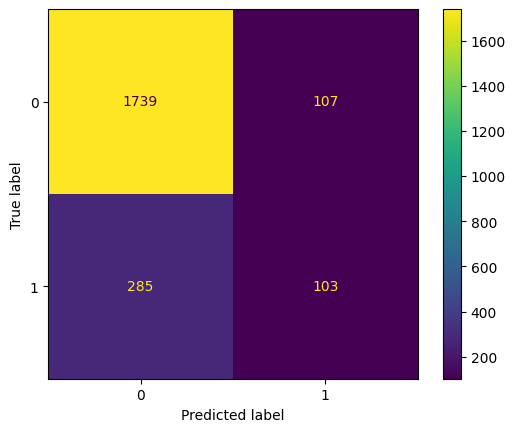

In [37]:
# Compute values for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


log_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=model.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [38]:
model.score(x_test,y_test)

0.8245299910474485

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1846
           1       0.49      0.27      0.34       388

    accuracy                           0.82      2234
   macro avg       0.67      0.60      0.62      2234
weighted avg       0.80      0.82      0.80      2234



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

# bay

In [40]:
X = df_enc.drop('left', axis=1).copy()
y = df_enc['left'].copy()

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# สมมติว่า X คือ features และ y คือ target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Naive Bayes (GaussianNB เหมาะสำหรับข้อมูลแบบต่อเนื่อง)
model = GaussianNB()

# ฝึกสอนโมเดล
model.fit(X_train, y_train)

# ทำนายผลลัพธ์
y_pred = model.predict(X_test)

# ประเมินผลลัพธ์ (ตัวอย่างใช้ accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.855863921217547
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1846
           1       0.56      0.80      0.66       388

    accuracy                           0.86      2234
   macro avg       0.76      0.83      0.78      2234
weighted avg       0.88      0.86      0.87      2234



In [42]:
x_test.shape

(2234, 18)

# test load model

In [49]:
import pickle

# โหลดโมเดลจากไฟล์
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# ข้อมูลใหม่สำหรับทำนาย
new_data = [[0.11, 0.88, 7, 272, 4, 0, 0, 1, False, False, False, False, False, False, False, True, False, False]]

# ทำนายผลลัพธ์
result = loaded_model.predict(new_data)

# แสดงผลลัพธ์
print(result)

[1]


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
